In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [5]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.9501371735340495


# 1. Linear Relationship

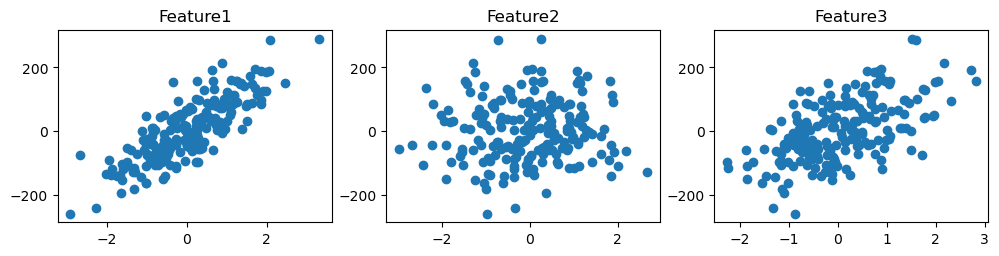

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

# 2. Multicollinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [19]:
vif

[1.0071786177364226, 1.0167248725888556, 1.0195463747763858]

In [16]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.007179,1.016725,1.019546


<Axes: >

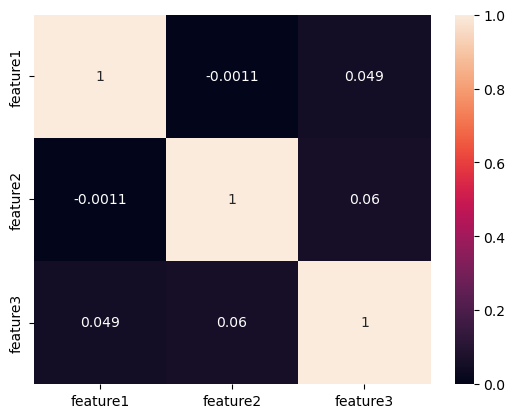

In [20]:
sns.heatmap(df.iloc[:,0:3].corr(), annot=True)

# 3. Normal Residual

In [22]:
residual = y_pred-y_test

C:\Users\as233\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


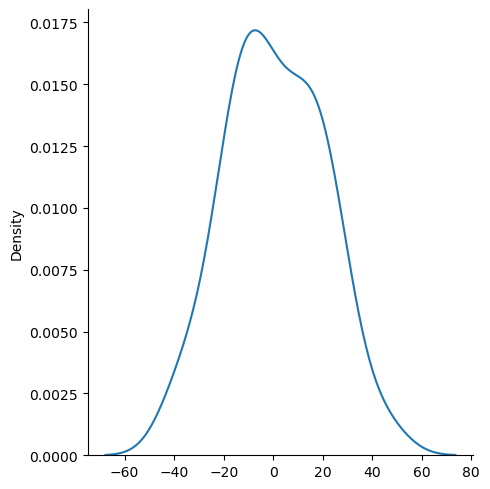

In [27]:
sns.displot(residual,kind='kde')
# sns.kdeplot(residual)

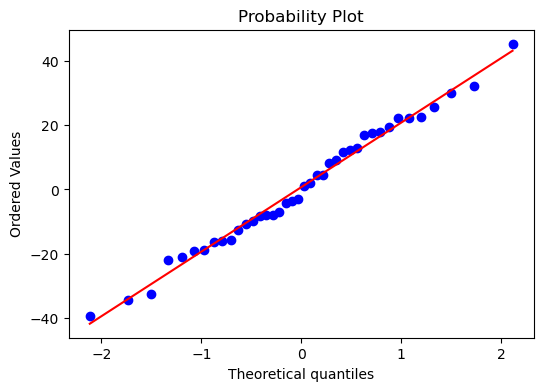

In [28]:
# QQ plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

# 4.Homoscedasticity

<Axes: >

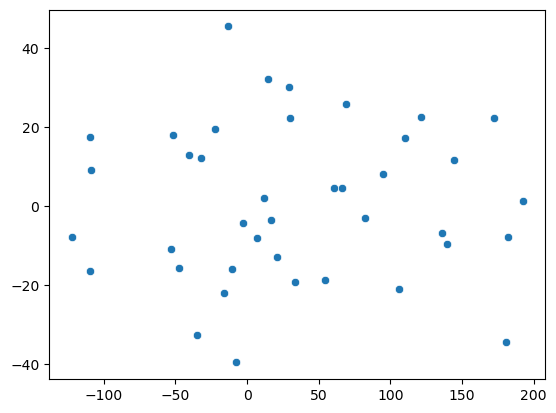

In [30]:
sns.scatterplot(x=y_pred,y=residual)

# 5. No Autocorrelation of Error

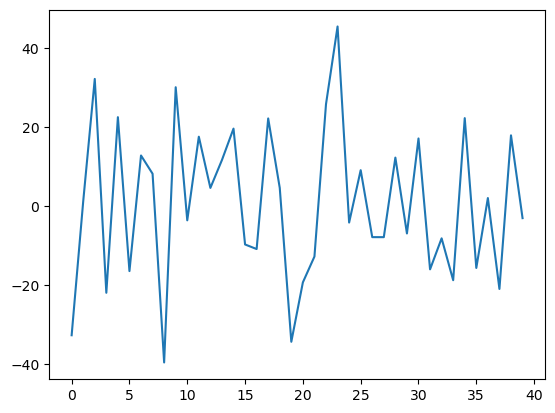

In [31]:
plt.plot(residual)